In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aero_old_path = "../data/aerophoto/ortho_old/192"
aero_old = os.listdir(aero_old_path)
aero_new_path = "../data/aerophoto/ortho_new/192"


In [3]:
def diff_img(a, b):
    a = a.reshape(-1).astype(np.float)
    b = b.reshape(-1).astype(np.float)
    diff = a-b
    sq_diff = diff**2
    sq_diff_sum = np.mean(sq_diff)
    return np.sqrt(sq_diff_sum)

In [4]:
aero_old_path = "../data/aerophoto/ortho_old/192"
aero_new_path = "../data/aerophoto/ortho_new/192"

refrection_old_path = "../data/refrection/ortho_old/192" # rtho_old/192"
refrection_new_path = "../data/refrection/ortho_new/192"

elevation_old_path = "../data/elevation/ortho_old/192" # rtho_old/192"
elevation_new_path = "../data/elevation/ortho_new/192"

shaded_relief_old_path = "../data/shaded-relief/ortho_old/192" # rtho_old/192"
shaded_relief_new_path = "../data/shaded-relief/ortho_new/192"


In [5]:
df = pd.read_csv("../data/shape/R020101-R030101/R020101-R030101.csv")

In [7]:
df_list = df.TEXT.values
n_sample = len(df)
#n_sample = 1000
df_list = df_list[:n_sample]
df_label = df["判定"].values
df_label = df_label[:n_sample]
d1 = []
d2 = []
d3 = []
d4 = []
labels = []
names = []

lost_name = []
for name, label in tqdm.tqdm(zip(df_list, df_label)):
    name = name + ".png"
    old_tmp_1 = cv2.imread(os.path.join(aero_old_path, name), 1)
    new_tmp_1 = cv2.imread(os.path.join(aero_new_path, name), 1)
    if not isinstance(old_tmp_1, np.ndarray):
        lost_name.append(name)
        continue
    continue
    d_aero = diff_img(new_tmp_1, old_tmp_1)
    
    old_tmp_1 = cv2.imread(os.path.join(refrection_old_path, name), 1)
    new_tmp_1 = cv2.imread(os.path.join(refrection_new_path, name), 1)
    d_ref = diff_img(new_tmp_1, old_tmp_1)
    
    old_tmp_1 = cv2.imread(os.path.join(elevation_old_path, name), 1)
    new_tmp_1 = cv2.imread(os.path.join(elevation_new_path, name), 1)
    d_ele = diff_img(new_tmp_1, old_tmp_1)
    
    old_tmp_1 = cv2.imread(os.path.join(shaded_relief_old_path, name), 1)
    new_tmp_1 = cv2.imread(os.path.join(shaded_relief_new_path, name), 1)
    d_shade = diff_img(new_tmp_1, old_tmp_1)
    d1.append(d_aero)
    d2.append(d_ref)
    d3.append(d_ele)
    d4.append(d_shade)
    labels.append(label)
    names.append(name)
                            

116830it [14:50, 131.17it/s]


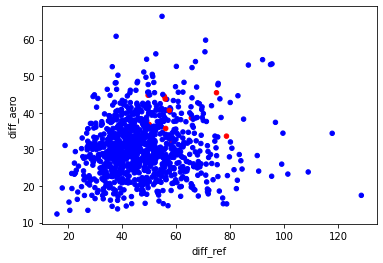

In [10]:
result = pd.DataFrame()
result["diff_aero"] = d1
result["diff_ref"] = d2
result["diff_ele"] = d3
result["diff_shade"] = d4
result["name"] = names
result["label"] = labels
result["label"] = result["label"].replace(0, "blue")
result["label"] = result["label"].replace(1, "red")
blue = result[result.label == "blue"].sample(n=10, random_state=1)
red = result[result.label == "red"]# .sample(n=10, random_state=1)
#result = pd.concat([blue, red])

ax1 = result.plot.scatter(x='diff_ref',y='diff_aero',c='label')
plt.savefig("sample.jpg")

In [8]:
result[(result["diff_ref"] > 100) & (result["label"] == "blue")]

,diff_aero,diff_ref,diff_ele,diff_shade,name,label
14610,30.812573,110.074418,2.119161,77.489552,toshima113311.png,blue
4473,16.964708,105.400903,0.595226,64.348610,toshima104022.png,blue
3054,38.294552,130.153215,5.089972,142.176779,toshima102746.png,blue
97413,39.328545,105.581299,0.702487,70.292037,toshima8283.png,blue
49145,50.373259,126.585082,2.355295,82.778830,toshima39247.png,blue
30046,46.675017,135.124630,0.715262,81.660241,toshima22057.png,blue
42697,32.215653,191.109963,0.407000,77.102443,toshima33443.png,blue
59422,30.683348,105.665952,5.888774,102.591066,toshima48535.png,blue
56060,55.440104,151.364722,0.916320,70.359443,toshima45491.png,blue
25333,56.213660,102.413412,16.362767,153.674226,toshima17816.png,blue


In [12]:
result.to_csv("../data/result.csv")

In [14]:
old_tmp_1 == None

True

In [23]:
lost_name

['toshima104238.png',
 'toshima104239.png',
 'toshima104240.png',
 'toshima104241.png',
 'toshima104242.png',
 'toshima104243.png',
 'toshima104244.png',
 'toshima104245.png',
 'toshima104246.png',
 'toshima104247.png',
 'toshima104248.png',
 'toshima104249.png',
 'toshima104250.png',
 'toshima104251.png',
 'toshima104252.png',
 'toshima104253.png',
 'toshima104254.png',
 'toshima104255.png',
 'toshima104256.png',
 'toshima104257.png',
 'toshima104258.png',
 'toshima104259.png',
 'toshima104260.png',
 'toshima104261.png',
 'toshima104262.png',
 'toshima104263.png',
 'toshima104264.png',
 'toshima104265.png',
 'toshima104266.png',
 'toshima104267.png',
 'toshima104268.png',
 'toshima104269.png',
 'toshima104270.png',
 'toshima104271.png',
 'toshima104272.png',
 'toshima104273.png',
 'toshima104274.png',
 'toshima104456.png',
 'toshima104457.png',
 'toshima104458.png',
 'toshima104459.png',
 'toshima104460.png',
 'toshima104461.png',
 'toshima104462.png',
 'toshima104463.png',
 'toshima1

In [24]:
len(df)

116830

In [13]:
len(result)

116473